# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic_data/train.p'
validation_file= 'traffic_data/valid.p'
testing_file = 'traffic_data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)#preprocess images to grayscale with color channel as 1
# color_num = 1

# TODO: What's the shape of an traffic sign image?
image_shape = np.array(X_train[0]).shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =",n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Min value of labels:    0
Max value of labels:   42


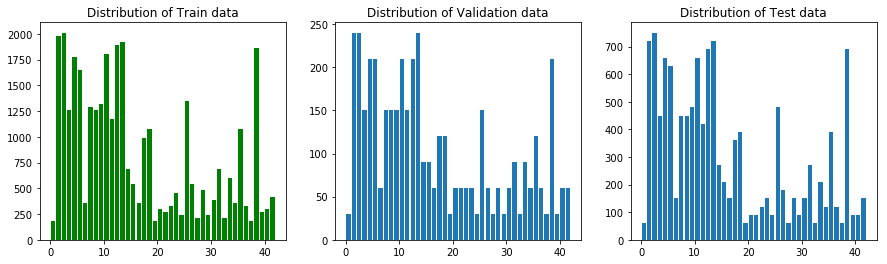

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import statistics
# Visualizations will be shown in the notebook.
%matplotlib inline
print('Min value of labels:{:>5}\nMax value of labels:{:>5}'.format(min(y_train),max(y_train)))

#histograph of train, valid and test data
labels_list = list(range(n_classes))
fig_his = plt.figure(figsize=(15,4))
fig_his.add_subplot(1,3,1)
plt.hist(y_train, labels_list,facecolor ='g',rwidth=0.8)
plt.title('Distribution of Train data')
fig_his.add_subplot(1,3,2)
plt.hist(y_valid,labels_list,rwidth=0.8)
plt.title('Distribution of Validation data')
fig_his.add_subplot(1,3,3)
plt.hist(y_test,labels_list,rwidth=0.8)
plt.title('Distribution of Test data')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

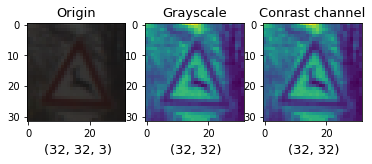

In [4]:
# Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
import cv2
# converting to grayscale.
def grayscale(input_image):
    """Apply grayscale transform 
    to input input_image"""
    return cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)


def rgb2yuv(input_image):
    """Apply YUV transform for input image.
    Y′ stands for the luma component (the brightness) 
    U and V are the chrominance (color) components
    """
    return cv2.cvtColor(input_image, cv2.COLOR_RGB2YUV)
### Feel free to use as many code cells as needed.
#TEST
testIm = X_train[235]

test1 = np.copy(testIm)
fig = plt.figure()

# print original image
fig.add_subplot(1,3,1)
plt.imshow(test1)
plt.title('Origin',fontsize = 13)
plt.text(16,42,test1.shape, ha='center',fontsize=13)

# print grayscaled image
test1_g = grayscale(test1)
fig.add_subplot(1,3,2)
plt.imshow(test1_g)
plt.title('Grayscale',fontsize = 13)
plt.text(16,42,test1_g.shape, ha='center',fontsize=13)

# print YUV image
test1_y = rgb2yuv(test1)
test1_y = test1_y[:,:,0]
fig.add_subplot(1,3,3)
plt.imshow(test1_y)
plt.title('Conrast channel',fontsize = 13)
plt.text(16,42,test1_y.shape, ha='center',fontsize=13)

plt.show()

> ** First training was fed with original rgb images and got an nearly 0.9 validation accuracy, so I tried the second time with grayscale only, normalization only and grayscale combined normalization. The former yield under 0.9 accuracy while the latter yield worse with differenct epochs, steps. Then I got an at least over 0.9 accuracy with single channel Y after an YUV transform. So the following training will be preprocessed to Y-channelled image with other possible augmentations. **

> ** Trained with normalization give poor validation accuracy, so the following training will not use normalization**

In [5]:
import random as rd

38


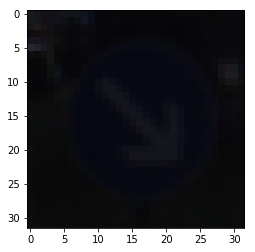

Original image shape    : (32, 32, 3)
Preprocessed image shape: (32, 32)
(32, 32)


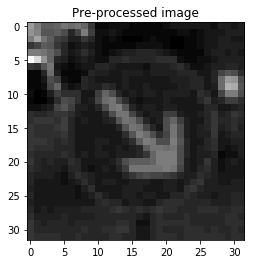

In [34]:
#pre-process image
def pre_process(image):
    """Pre-process input image:
    1. grayscale
    2. yuv-transform
    3. normalize with formular: (pixal - 125)/125
    4. TODO: add further preprocession if necessary...
    """
    gray = grayscale(image)
#     yuv = rgb2yuv(image)
#     y_channel = yuv[:,:,0]
#     print(y_channel)
#     print(yuv[:,:,1])
#     print(yuv[::,2])
#     print(y_channel.std())
#     print(y_channel.mean())
#     local = 255*(y_channel-y_channel.mean())/y_channel.std()

#     local = mean_std_norm(local)#(gray)
#     rgb = cv2.cvtColor(norm,cv2.COLOR_GRAY2RGB)
    #TODO: add further preprocession 235
    return gray/255.0-0.5
# test

tem_in = rd.randint(0,len(X_train))
test_im = X_train[tem_in]
test_np = np.copy(test_im)
print(y_train[tem_in])
plt.imshow(test_im)
plt.show()
print('Original image shape    : {}'.format(test_np.shape))
test_pre = pre_process(test_np)
print('Preprocessed image shape: {}'.format(test_pre.shape))
plt.imshow(test_pre,cmap='gray')
print(test_pre.shape)
plt.title('Pre-processed image')
plt.show()

In [35]:
#augment bightness reference from (https://medium.com/@vivek.yadav/
#improved-performance-of-deep-learning-neural-network-models-on-traffic-sign-classification-using-6355346da2dc)
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    image1 = np.array(image1, dtype = np.float64)
    random_bright = .5+np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1[:,:,2][image1[:,:,2]>255]  = 255
    image1 = np.array(image1, dtype = np.uint8)
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

(33, 33, 3)


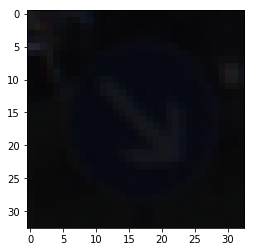

In [36]:
def random_resize(image=None, resize_x=1, resize_y=1, rd_resize = True):
    """Random resizing image for 
    @res_x: x dimension and 
    @res_y: dimension
    @rd_resize: True by default, resizing out put will be 
                calculated based on resize_x if resize_y not given
                """
    if image is None or resize_x <=0 or resize_y <0:
        print('Input image is none')
        return None
    
    if rd_resize: # return an randomly resized images within01 and given extension coefficients
        fx = rd.uniform(resize_x*.9,resize_x*1.1)
        if resize_y == 0:
            fy = fx
            return cv2.resize(image,None,fx=fx, fy=fy, interpolation = cv2.INTER_CUBIC)
        else:
            fy = rd.uniform(resize_y*0.9,resize_y*1.1)
#             print('Image distorted!')
            return cv2.resize(image,None,fx= fx, fy= fy, interpolation = cv2.INTER_CUBIC)
    else:
        return cv2.resize(image,None,fx=resize_x, fy=resize_y, interpolation = cv2.INTER_CUBIC)
    
res = random_resize(test_np,1,0)
print(res.shape)
plt.imshow(res)

(36, 42, 3)


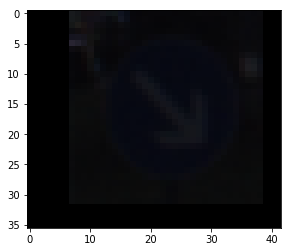

In [37]:
def random_padding(image = None, output_size = (None, None)):
    """Randomly padding black borders"""
    if image is None:
        return None
    if output_size[0] is None or output_size[1] is None:
        return None
    pad = np.copy(image)
    if len(pad.shape) <2:
        return None
    rows, cols = pad.shape[:2]
    r_pad = output_size[0]-rows
    c_pad = output_size[1]-cols
    if r_pad < 0 or c_pad <0:
        return image
    else:
        up = rd.randint(0,r_pad)
        down = r_pad - up
        left = rd.randint(0,c_pad)
        right = c_pad - left
        return cv2.copyMakeBorder(pad,up,down,left,right,cv2.BORDER_CONSTANT,value=(0))
#test    
rp = random_padding(test_np,(36,42))
print(rp.shape)
plt.imshow(rp)

(32, 32, 3)


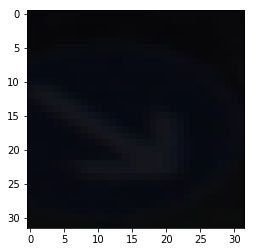

In [38]:
def random_crop(image=None, crop_frame = (None,None)):
    if image is None:
        return None
    if crop_frame[0] is None or crop_frame[1] is None:
        return image
    crop_i = np.copy(image)
    if len(crop_i.shape) <2:
        return None
    #rows number and colunms number of input image
    rows, cols = crop_i.shape[:2]
    
    if crop_frame[0] > rows  and crop_frame[1] > cols:
        print('Expected dimensions exceed input image, original image will be returned!')
        return image
    row_max = rows - crop_frame[0]
    col_max = cols - crop_frame[1]
    if row_max <= 0:
        row_max = 0
    if col_max <= 0:
        col_max = 0
        
    row_start = rd.randint(0,row_max)
    col_start = rd.randint(0,col_max)
    return crop_i[row_start:row_start+crop_frame[0],col_start:col_start+crop_frame[1]]
enlarge = random_crop(random_resize(test_np,2),(32,32))
print(enlarge.shape)
plt.imshow(enlarge)

(32, 32, 3)


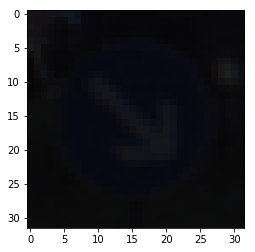

In [39]:
def image_resize(image = None,resize_x = 3,resize_y = 1,re_size=(32,32)):
    """Get images randomly resized and adjusted to (32,32)"""
    if image is None:
        return None
    resize = random_resize(image,resize_x,resize_y)
    if resize.shape[0] > re_size[0] or resize.shape[1] > re_size[1]:
        crop = random_crop(resize,re_size)
        pad = random_padding(crop,re_size)
        return pad
    else:
        return image

#test
re_image = image_resize(test_np,1,1,re_size=(32,32))
print(re_image.shape)
plt.imshow(re_image)

(32, 32, 3)
(32, 32, 3)


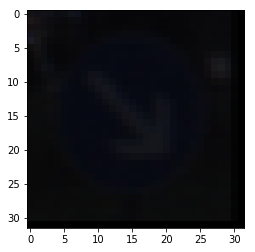

In [46]:
def random_translate(image=None,shift_x=0,shift_y=0, shift_factor=10):
    """Random shifting image wiht a given direction
    @shift_x: x direction (0,1)
    @shift_y: y direction (0,1)
    @shift_factor: vertical or horizontal shifting percentage
                  if both shift_x and shift_y are 0, then image
                  will be randomly shifted within @shift_factor percentage 
                  of the original image"""
    #TODO complete random shifting
    trans = np.copy(image)
    dim = trans.shape
    if len(dim)<2:
        return None
    rows,cols = dim[:2]
    dim_shift = (rd.randint(-shift_factor,shift_factor)/100,rd.randint(-shift_factor,shift_factor)/100) if shift_x==0 and shift_y==0 else (shift_x,shift_y)
    rows_sh,cols_sh = np.multiply(dim_shift[:2],dim[:2])
    return cv2.warpAffine(image,np.float32([[1,0,rows_sh],[0,1,cols_sh]]),(cols,rows))

print(test_np.shape)
dst = random_translate(test_np)
print(dst.shape)
plt.imshow(dst)

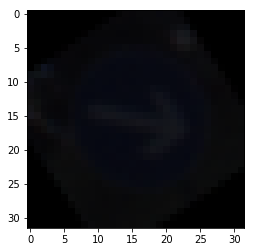

In [45]:
def random_rotate(image=None, max_rot_angle=5,zoom = 1):
    """Random shifting image wiht a given direction
    @shift_x: x direction (0,1)
    @shift_y: y direction (0,1)
    @shift_factor: vertical or horizontal shifting percentage
                  if both shift_x and shift_y are 0, then image
                  will be randomly shifted within @shift_factor percentage 
                  of the original image"""
    if image is None:
        return None
    rot = np.copy(image)
    if len(rot.shape) < 2:
        return None
    rows,cols = rot.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),rd.randint(-max_rot_angle,max_rot_angle),rd.uniform(zoom*0.8,zoom*1.2))
    return cv2.warpAffine(rot,M,(cols,rows))
ro = random_rotate(test_np,45)
plt.imshow(ro)

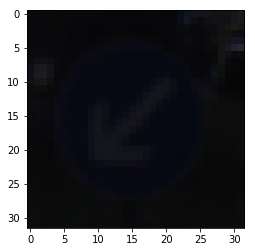

In [42]:
def random_flip(image= None):
    if image is None:
        return None
    flip_code = rd.randint(-1,1)
    return cv2.flip(image,flip_code)

flip = np.copy(test_np)
flip = random_flip(flip)
plt.imshow(flip)

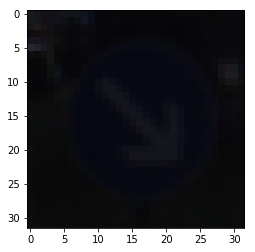

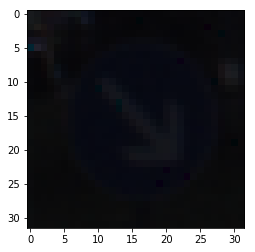

In [43]:
def random_salt_pepper(image = None):
    dss = np.copy(image)
    row,col,ch = dss.shape
    s_vs_p = 0.5
    amount = 0.004
    out = np.copy(dss)
    # Salt mode
    num_salt = np.ceil(amount * dss.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in dss.shape]
    out[coords] = 1
    # Pepper mode
    num_pepper = np.ceil(amount* dss.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in dss.shape]
    out[coords] = 0
    return out
sp = random_salt_pepper(test_np)
plt.imshow(test_np)
plt.show()
plt.imshow(sp)

In [44]:
def augment_image(image = None):
    """Single process to augment one image"""
    if image is None:
        return None
    out = image
    prob = rd.uniform(0,1)
    if  prob < 0.1: # resize the image with 30% probability
        out = image_resize(out,1,1,(32,32))
    elif prob < 0.2: #distort image with 20%
        out = image_resize(out,1,0,(32,32))
    elif prob < 0.4:
        out = random_translate(out)
    elif prob < 0.6:
        out = random_rotate(out)
    elif prob < 0.8:
        out = random_salt_pepper(out)
    else:
        out = random_flip(out)
    out = augment_brightness_camera_images(out)
    return out

2


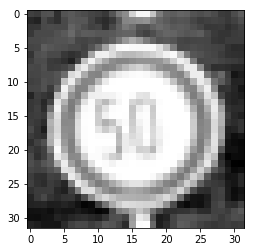

In [47]:
def image_augmentation(input_images = None, input_lables = None, aug_factor = 2):
    """batch process for Augment imagess"""
    aug_images = []
    aug_lables = []
    
    for im, la in zip(input_images,input_lables):
        for i in range(aug_factor):
            out = augment_image(im)
            aug_images.append(out)
            aug_lables.append(la)
    return aug_images,aug_lables

# test function
rand_index = rd.randint(0,len(X_train))
aug_image = augment_image(X_train[rand_index])
aug_image = pre_process(aug_image)
print(y_train[rand_index])
plt.imshow(aug_image,cmap='gray')

#### Image preprocessing ####

In [48]:
def image_preProcess(image_array):
    """image preprocessing""" 
    input_x = np.copy(image_array)
    processed = []
    for image in input_x:
        pro = pre_process(image)
        processed.append(pro.reshape((32,32,1)))
    return processed

### import tensorflow and sklearn ###

In [49]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

/home/keven/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [50]:
import os.path

accuracy_file_dir = 'accuracy_file.txt'
if not os.path.isfile(accuracy_file_dir):
    file_create = open(accuracy_file_dir,'w')
    file_create.write('0')
    file_create.close()

#read current validation accuracy of the model from csv
with open(accuracy_file_dir) as f:
    read_acc = f.readline()
    print(read_acc)
    current_max_accuracy = int(read_acc[0])

if current_max_accuracy <=0:
    current_max_accuracy =0
print(current_max_accuracy)    

0.816099773026
0


### Model Architecture 
#### Implementation of AlexNet ###

In [86]:
def LeNet(x,color_channel=3):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
#     weights = {
#         'wc1':tf.Variable(tf.truncated_normal([1,1,color_channel,3], mu, sigma)), 
#         'wc2': tf.Variable(tf.truncated_normal([3,3,3,108], mu, sigma)), #for rgb image, the 3-dim of input is 3 
#         'wc3': tf.Variable(tf.truncated_normal([3,3,32,64], mu, sigma)),
#         'wc4': tf.Variable(tf.truncated_normal([3,3,128], mu, sigma)),
#         'wf4': tf.Variable(tf.truncated_normal([120,84], mu, sigma)),
#         'wf5': tf.Variable(tf.truncated_normal([84,n_classes], mu, sigma))
#               }
#     biases = {
#         'b_1x1' : tf.Variable(tf.zeros([3])),
#         'b1' : tf.Variable(tf.zeros([32])),
#         'b2' : tf.Variable(tf.zeros([16])),
#         'bf3' : tf.Variable(tf.zeros([120])),
#         'bf4' : tf.Variable(tf.zeros([84])),
#         'bf5' : tf.Variable(tf.zeros([n_classes]))
#     }
#     strides = [1,1,1,1]
#     padding = 'VALID'
    
#     # first layer with 1x1x3 filters output with same shape as input but got color map 
#     cv_1x1 = tf.nn.conv2d(x,weights['wc_1x1'],strides,padding)
#     cv_1x1 = tf.nn.bias_add(cv_1,biases['b_1x1'])
#     #Activation
#     cv_1x1 = tf.nn.relu(cv_1x1)

    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    weights = {
        'wc1': tf.Variable(tf.truncated_normal([5,5,color_channel,8], mu, sigma)), #for rgb image, the 3-dim of input is 3 
        'wc2': tf.Variable(tf.truncated_normal([5,5,8,16], mu, sigma)),
        'wc3': tf.Variable(tf.truncated_normal([5,5,16,64], mu, sigma)),
        'wf3': tf.Variable(tf.truncated_normal([1408,172], mu, sigma)),
        'wf4': tf.Variable(tf.truncated_normal([172,86], mu, sigma)),
        'wf5': tf.Variable(tf.truncated_normal([86,n_classes], mu, sigma))
    }
    biases = {
        'b1' : tf.Variable(tf.zeros([8])),
        'b2' : tf.Variable(tf.zeros([16])),
        'b3' : tf.Variable(tf.zeros([64])),
        'bf3' : tf.Variable(tf.zeros([172])),
        'bf4' : tf.Variable(tf.zeros([86])),
        'bf5' : tf.Variable(tf.zeros([n_classes]))
    }
    strides = [1,1,1,1]
    cv_padding = 'SAME'
    mp_padding = 'VALID'
    keep_prob = tf.placeholder(tf.float32,(2))

    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 8@32x32
    cv_1 = tf.nn.conv2d(x,weights['wc1'],strides,cv_padding)
    cv_1 = tf.nn.bias_add(cv_1,biases['b1'])
    cv_1 = tf.nn.relu(cv_1)
    
    # Pooling. Input = 8@32x32. Output = 8@16x16.
    k_pool = [1,2,2,1]
    s_pool = [1,2,2,1]
    cv_1 = tf.nn.max_pool(cv_1,k_pool,s_pool, mp_padding)
#     cv_1 = tf.nn.dropout(cv_1,keep_prob[0])
    
    # Layer 2: Convolutional. Input = 8@16x16, Output = 16@16x16
    cv_2 = tf.nn.conv2d(cv_1,weights['wc2'],strides,cv_padding)
    cv_2 = tf.nn.bias_add(cv_2, biases['b2'])
    cv_2 = tf.nn.relu(cv_2)
    
    # Pooling. Input = 16@16x16. Output = 16@8x8.
    cv_2 = tf.nn.max_pool(cv_2, k_pool,s_pool,mp_padding)
#     cv_2 = tf.nn.dropout(cv_2,keep_prob[1])

    # Layer 3: Convolutional. Input = 16@8X8, Output = 64@8x8
    cv_3 = tf.nn.conv2d(cv_2,weights['wc3'],strides,cv_padding)
    cv_3 = tf.nn.bias_add(cv_3, biases['b3'])
    cv_3 = tf.nn.relu(cv_3)
    
    # Pooling. Input = 64@8X8. Output = 64@4X4.
    cv_3 = tf.nn.max_pool(cv_3, k_pool,s_pool,mp_padding)
#     cv_3 = tf.nn.dropout(cv_3,keep_prob[2])

    
    # Layer 1 Feedforward mp with 4 times downsampling: Input = 8@16x16, Output = 8@4x4
    cv_1_mp = tf.nn.max_pool(cv_1,[1,4,4,1],[1,4,4,1], mp_padding)
    # Flatten. Input = 8@4x4. Output = 128.    
    fl1 = flatten(cv_1_mp)
    
    # Layer 2 Feedforward mp with 2 times downsampling: Input = 16@8x8, Output = 16@4x4
    cv_2_mp = tf.nn.max_pool(cv_2,[1,2,2,1],[1,2,2,1], mp_padding)
    # Flatten. Input = 16@4x4. Output = 256.    
    fl2 = flatten(cv_2_mp)
    
    # Layer 3 flatten: Input = 64@4X4, Output = 1024
    fl3 = flatten(cv_3)
    
    # Concatenate layer 1, layer 2 and layer 3. Input 1: 128, Input 2: 256,Input 3: 1024, Output = 1408
    fl = tf.concat([fl1,fl2,fl3],1)
#     fl = fl3

    # Layer 3: Fully Connected. Input = 1408. Output = 172.
    fc_1 = tf.add(tf.matmul(fl,weights['wf3']), biases['bf3'])
    # Activation.
    fc_1 = tf.nn.relu(fc_1)
    #add dropout layer to control the complexity of the model , prevents co-adaptation of
    # features.
    fc_1 = tf.nn.dropout(fc_1,keep_prob[0])
    # TODO: Layer 4: Fully Connected. Input = 172. Output = 86.
    fc_2 = tf.add(tf.matmul(fc_1, weights['wf4']), biases['bf4'])
#     # TODO: Activation.
    fc_2 = tf.nn.relu(fc_2)
#     #second dropout layer to control the complexity of the model , prevents co-adaptation of
#     # features.
    fc_2 = tf.nn.dropout(fc_2,keep_prob[1])
    # TODO: Layer 5: Fully Connected. Input = 86. Output = 43.
    logits = tf.add(tf.matmul(fc_2, weights['wf5']), biases['bf5'])
    return logits,keep_prob

### Train, Validate and Test the Model

In [55]:
#image augmentation by 10
X_train_au, y_train_au = image_augmentation(X_train,y_train,4)
# print(np.array(X_train_au).shape)
# print(np.array(y_train_au).shape)
X_train_au = np.concatenate((X_train, X_train_au))
y_train_au = np.concatenate((y_train, y_train_au))
# print(X_train_au.shape)
# print(y_train_au.shape)
# color channel number of input images,original is rgb with value = 3
# color_num = 3
x_train_pre = image_preProcess(X_train_au)
x_valid_pre = image_preProcess(X_valid)
# x_train_pre = X_train
# y_train_au = y_train
# x_valid_pre = X_valid

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [95]:
#define epochs and batch size
EPOCHS = 20
BATCH_SIZE = 128
rate = 0.003

# Pre-processed
# x_train,x_valid,color_num = x_train_pre,x_valid_pre,1
# original
# x_train,x_valid, color_num = X_train,X_valid,3
color_num = 1

# Features and Labels
x = tf.placeholder(tf.float32, (None, 32,32,color_num)) # for rgb images, the third dimentions is 3
y = tf.placeholder(tf.int32,(None))
one_hot_y = tf.one_hot(y, n_classes)

### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

#Training pipeline 
logits,keep_prob = LeNet(x,color_num)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

####  Evaluation model ####

In [ ]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:[1.0,1.0]})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
train_loss = []
valid_loss = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train_pre)
    num_original = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
#         X_train, y_train = shuffle(X_train, y_train)
#         print('Training examples number:{:>3}'.format(num_examples))
        x_train_shuffled, y_train_shuffled = shuffle(x_train_pre, y_train_au,n_samples = num_examples)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train_shuffled[offset:end], y_train_shuffled[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:[0.5,0.5]})
# #         print("Training loss = {:.3f}".format(train_loss_local))
#         print(train_loss_local)
#         train_loss.append(loss_operation)
#         print(loss_operation.eval)
        
        if i >10:
            if num_examples < num_original:
                num_examples = int(num_examples*0.95)
            else:
                # decrease training examples by factor of 0.9 for each epoch
                num_examples = int(num_examples*0.9)
       
        validation_accuracy = evaluate(x_valid_pre, y_valid)
        
        valid_loss.append(1-validation_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy)) 
        
        if validation_accuracy > current_max_accuracy:
            current_max_accuracy = validation_accuracy
            saver.save(sess, './lenet')
            print("Model saved with accuracy:{:>3}".format(current_max_accuracy))
        print()  
    print('Current max accuracy:{}'.format(current_max_accuracy))

with open(accuracy_file_dir,'w') as f:
    f.write(str(current_max_accuracy))

Training...

EPOCH 1 ...
Validation Accuracy = 0.759

EPOCH 2 ...
Validation Accuracy = 0.866

EPOCH 3 ...
Validation Accuracy = 0.893

EPOCH 4 ...
Validation Accuracy = 0.874

EPOCH 5 ...
Validation Accuracy = 0.911

EPOCH 6 ...
Validation Accuracy = 0.911

EPOCH 7 ...
Validation Accuracy = 0.898

EPOCH 8 ...
Validation Accuracy = 0.902

EPOCH 9 ...
Validation Accuracy = 0.911



### Visualize loss of train (o) and validation

In [81]:
# plt.figure()
# x_span = np.arange(1,1+EPOCHS)   
# # plt.plot(x_span,train_loss,'o')
# plt.plot(x,valid_loss)

#### Train and validate the model####

34799
34799
(32, 32, 1)
9


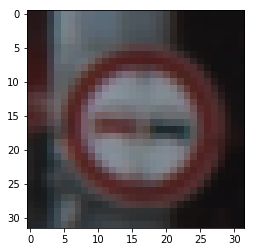

1


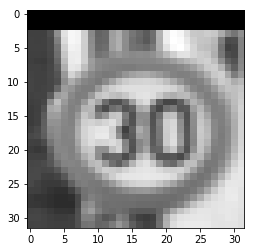

In [72]:
print(len(X_train))
leng = len(X_train)
print(leng)
rd_index = rd.randint(0,leng)
rd_im = np.array(x_train_pre[rd_index+leng])
print(rd_im.shape)
rd_im = rd_im.reshape((32,32))
plt.imshow(X_train[rd_index])
print(y_train_au[rd_index])
plt.show()
plt.imshow(rd_im,cmap='gray')
print(y_train_au[rd_index+leng])
plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

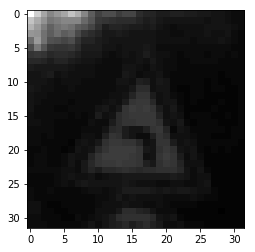

In [75]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
testshow = X_test[235]
# testshow = grayscale(testshow)
# plt.imshow(testshow)
# plt.show()
testshow = pre_process(testshow)
plt.imshow(testshow,cmap='gray')
plt.show()

### Predict the Sign Type for Each Image

In [76]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import csv
#sign labels
labels =[]
#read into sign file and write into the container
with open('signnames.csv',newline = '') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        labels.append(row[1])

In [77]:
def get_label(x_index):
    """get corresponding label name from given index"""
    if type(x_index) is np.ndarray and len(x_index)>1:
        labs = []
        for i in x_index:
            labs.append(labels[i])
        return labs
    else: 
        return labels[x_index]

In [82]:
# correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
# accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
num_examples = len(X_test)
X_labels = []
p_index = []
predict_lable = tf.argmax(logits, 1)

#preprocess test data
x_test_pre = image_preProcess(X_test)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
#     for offset in range(0, num_examples):
#         batch_x, batch_y = X_test[offset:offset+BATCH_SIZE], y_test[offset:offset+BATCH_SIZE]
    p_index = sess.run(predict_lable, feed_dict={x: x_test_pre})

INFO:tensorflow:Restoring parameters from ./lenet


NotFoundError: Key Variable_34 not found in checkpoint
	 [[Node: save_10/RestoreV2_84 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save_10/Const_0_0, save_10/RestoreV2_84/tensor_names, save_10/RestoreV2_84/shape_and_slices)]]
	 [[Node: save_10/RestoreV2_103/_259 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_566_save_10/RestoreV2_103", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]

Caused by op 'save_10/RestoreV2_84', defined at:
  File "/home/keven/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/keven/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/keven/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/keven/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/keven/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/keven/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/keven/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-70-5b4294f3361a>", line 3, in <module>
    saver = tf.train.Saver()
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1218, in __init__
    self.build()
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1227, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1263, in _build
    build_save=build_save, build_restore=build_restore)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 751, in _build_internal
    restore_sequentially, reshape)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 427, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 267, in restore_op
    [spec.tensor.dtype])[0])
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1021, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

NotFoundError (see above for traceback): Key Variable_34 not found in checkpoint
	 [[Node: save_10/RestoreV2_84 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save_10/Const_0_0, save_10/RestoreV2_84/tensor_names, save_10/RestoreV2_84/shape_and_slices)]]
	 [[Node: save_10/RestoreV2_103/_259 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_566_save_10/RestoreV2_103", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]


In [ ]:
print('length is {}'.format(len(p_index)))
print(max(p_index))
print(min(p_index))
print(num_examples)
for index in range(num_examples):
    X_labels.append(get_label(p_index[index]))

In [ ]:
ii=100
print(labels[y_test[ii]])
plt.imshow(X_test[ii])
plt.title(X_labels[ii])

### Test

In [83]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(x_test_pre, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet


NotFoundError: Key beta2_power_3 not found in checkpoint
	 [[Node: save_10/RestoreV2_151 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save_10/Const_0_0, save_10/RestoreV2_151/tensor_names, save_10/RestoreV2_151/shape_and_slices)]]
	 [[Node: save_10/RestoreV2_103/_259 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_566_save_10/RestoreV2_103", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]

Caused by op 'save_10/RestoreV2_151', defined at:
  File "/home/keven/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/keven/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/keven/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/keven/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/keven/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/keven/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/keven/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-70-5b4294f3361a>", line 3, in <module>
    saver = tf.train.Saver()
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1218, in __init__
    self.build()
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1227, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1263, in _build
    build_save=build_save, build_restore=build_restore)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 751, in _build_internal
    restore_sequentially, reshape)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 427, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 267, in restore_op
    [spec.tensor.dtype])[0])
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1021, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/keven/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

NotFoundError (see above for traceback): Key beta2_power_3 not found in checkpoint
	 [[Node: save_10/RestoreV2_151 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save_10/Const_0_0, save_10/RestoreV2_151/tensor_names, save_10/RestoreV2_151/shape_and_slices)]]
	 [[Node: save_10/RestoreV2_103/_259 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_566_save_10/RestoreV2_103", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]


### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed

def top_5(logits):
    """Rturn top five possibilities and indices
    #input: array
    #output: 
             1.top five possibiities sorted from high to low 
             2. corresponding indices
             """
    return tf.nn.top_k(logits, k = 5)

### output sample

In [ ]:
pre_possibilities ,pre_indices = 0,0
#samples 
from random import sample
rand_indice = sample(range(0,len(x_test_pre)),5)
print(rand_indice)
x_samples = [x_test_pre[i] for i in rand_indice]

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    top_out = sess.run(tf.nn.top_k(logits, k=5), feed_dict={x:x_samples})

In [ ]:
#coloe and fond format
class color:
    """Reference from 
    https://stackoverflow.com/questions/8924173/how-do-i-print-bold-text-in-python"""
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [ ]:
i = 0
# print(x_test_pre[rand_indice[]])
# tt = np.array(top_out)
# print(tt.shape)
for pre_pro,pre_i in zip(top_out.values,top_out.indices):
    image_in = rand_indice[i]
    print('top five for {}th image:'.format(image_in))
    plt.imshow(X_test[image_in])
    plt.show()
#     print(pre_pro)
    sam_la = get_label(pre_i)
    print('Correct   lable: '+color.BOLD+get_label(y_test[image_in])+color.END)
    print('Predicted label: '+color.BOLD+sam_la[0]+ color.END+'      '+'      '.join(sam_la[1:]))
#     print()
    i+=1
    print()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
mu = 0
sigma = 0.1
    
# TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
weights = {
    'wc1': tf.Variable(tf.truncated_normal([5,5,1,6], mu, sigma)), #for rgb image, the 3-dim of input is 3 
    'wc2': tf.Variable(tf.truncated_normal([5,5,6,16], mu, sigma)),
    'wf3': tf.Variable(tf.truncated_normal([400,120], mu, sigma)),
    'wf4': tf.Variable(tf.truncated_normal([120,84], mu, sigma)),
    'wf5': tf.Variable(tf.truncated_normal([84,n_classes], mu, sigma))
}
biases = {
    'b1' : tf.Variable(tf.zeros([6])),
    'b2' : tf.Variable(tf.zeros([16])),
    'bf3' : tf.Variable(tf.zeros([120])),
    'bf4' : tf.Variable(tf.zeros([84])),
    'bf5' : tf.Variable(tf.zeros([n_classes]))
}
strides = [1,1,1,1]
padding = 'VALID'
cv_1 = tf.nn.conv2d(x,weights['wc1'],strides,padding)
cv_1 = tf.nn.bias_add(cv_1,biases['b1'])
    
# TODO: Activation.
cv_1 = tf.nn.relu(cv_1)
    
# TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
k_pool = [1,2,2,1]
s_pool = [1,2,2,1]
max_pool_1 = tf.nn.max_pool(cv_1,k_pool,s_pool, padding)
    
# TODO: Layer 2: Convolutional. Output = 10x10x16.
cv_2 = tf.nn.conv2d(max_pool_1,weights['wc2'],strides,padding)
cv_2 = tf.nn.bias_add(cv_2, biases['b2'])
    
# TODO: Activation.
cv_2 = tf.nn.relu(cv_2)
    
# TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
max_pool_2 = tf.nn.max_pool(cv_2, k_pool,s_pool,padding)
# TODO: Flatten. Input = 5x5x16. Output = 400.
fc = flatten(max_pool_2)
# TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
fc_1 = tf.add(tf.matmul(fc,weights['wf3']), biases['bf3'])
# TODO: Activation.
fc_1 = tf.nn.relu(fc_1)
# TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
fc_2 = tf.add(tf.matmul(fc_1, weights['wf4']), biases['bf4'])
# TODO: Activation.
fc_2 = tf.nn.relu(fc_2)
# TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
logits = tf.add(tf.matmul(fc_2, weights['wf5']), biases['bf5'])

In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [ ]:
from random import randint
vis_ind = randint(0,len(x_test_pre))
image_in = np.copy(x_test_pre[vis_ind])
plt.imshow(image_in.reshape((32,32)))
print(color.BOLD+'Original image')
plt.show()
image_input = [image_in]
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess.run(tf.global_variables_initializer())
    outputFeatureMap(image_input,cv_1)
    print(color.BOLD+'First convolution layer')
    plt.show()
    outputFeatureMap(image_input,max_pool_1)
    print(color.BOLD+'First maxpooling layer')
    plt.show()
    outputFeatureMap(image_input,cv_2)
    print(color.BOLD+'Second convolution layer')
    plt.show()
    outputFeatureMap(image_input,max_pool_2)
    print(color.BOLD+'Second maxpooling layer')
    plt.show()